# Exploratory data analysis
## INFO 511 - Foundation of Data Science
### WEEK-3
**Practice of EDA**

In [17]:
# Import all required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.stats import skewnorm
from scipy.stats import kurtosis, norm
from scipy.stats import gamma
import missingno as msno
import random
import statsmodels.api as sm


*LoadDataSet*

In [18]:
#Import dataset
births14 = pd.read_csv('births14.csv')
#EDA
births14.head() 
births14.info() 
births14.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   csvbase_row_id  1000 non-null   int64  
 1   fage            886 non-null    float64
 2   mage            1000 non-null   int64  
 3   mature          1000 non-null   object 
 4   weeks           1000 non-null   int64  
 5   premie          1000 non-null   object 
 6   visits          944 non-null    float64
 7   gained          958 non-null    float64
 8   weight          1000 non-null   float64
 9   lowbirthweight  1000 non-null   object 
 10  sex             1000 non-null   object 
 11  habit           981 non-null    object 
 12  marital         1000 non-null   object 
 13  whitemom        1000 non-null   object 
dtypes: float64(4), int64(3), object(7)
memory usage: 109.5+ KB


,csvbase_row_id,fage,mage,weeks,visits,gained,weight
count,1000.000000,886.000000,1000.000000,1000.000000,944.000000,958.000000,1000.000000
mean,500.500000,31.133183,28.449000,38.666000,11.351695,30.425887,7.198160
std,288.819436,7.058135,5.759737,2.564961,4.108192,15.242527,1.306775
min,1.000000,15.000000,14.000000,21.000000,0.000000,0.000000,0.750000
25%,250.750000,26.000000,24.000000,38.000000,9.000000,20.000000,6.545000
50%,500.500000,31.000000,28.000000,39.000000,12.000000,30.000000,7.310000
75%,750.250000,35.000000,33.000000,40.000000,14.000000,38.000000,8.000000
max,1000.000000,85.000000,47.000000,46.000000,30.000000,98.000000,10.620000


SetSeed

In [19]:
# Set seed
random.seed(123)

# What is exploratory data analysis?
## Exploratory Data Analysis is a statistical approach to analyzing datasets to summarize their main characteristics, often using visual methods.

## Visualizing data relationships


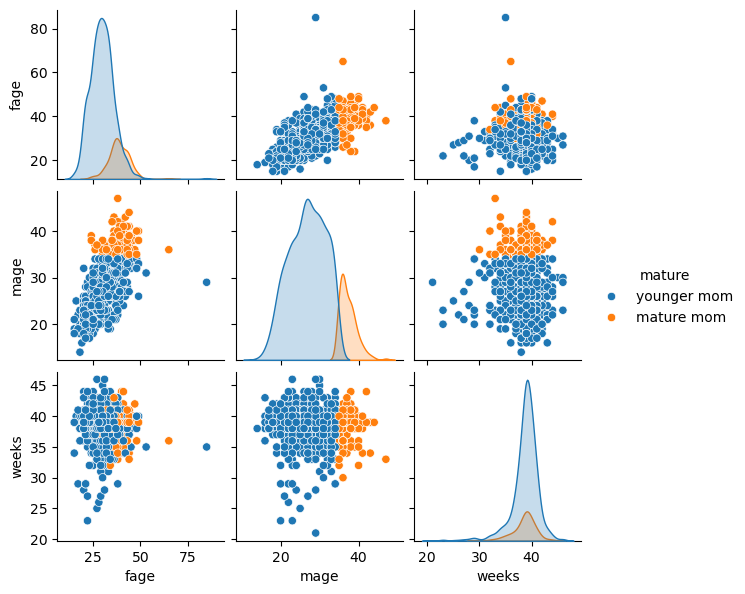

In [20]:
# Now is time to visualize the data
sns.pairplot(births14[['fage', 'mage', 'weeks', 'mature']], hue='mature', height=2)
plt.show()

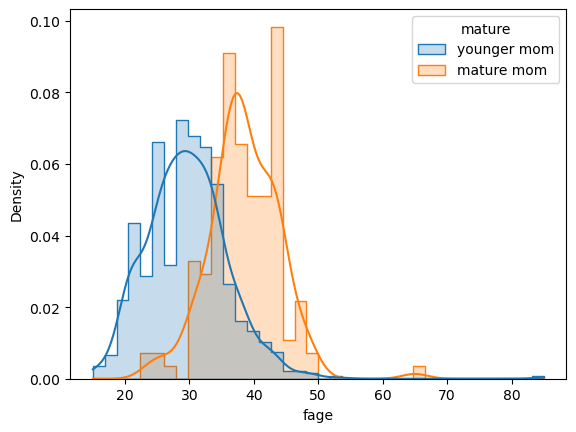

In [21]:
# Another way to visualize the data
sns.histplot(data=births14, x='fage', hue='mature', kde=True, element='step', stat='density', common_norm=False)        
plt.show()

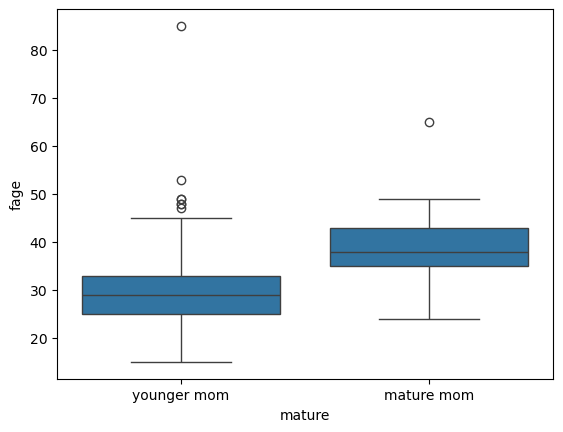

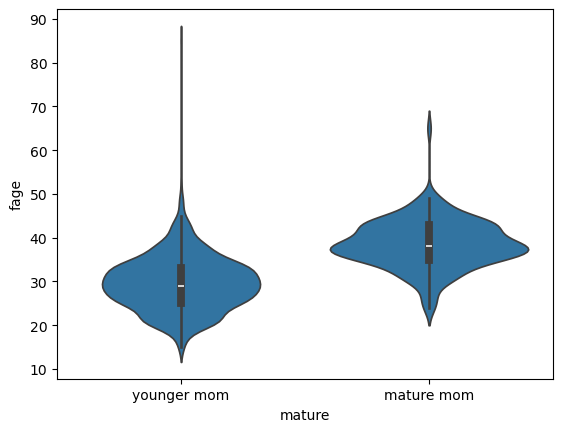

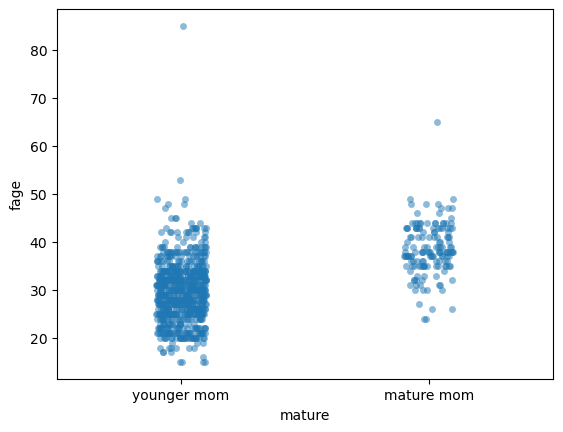

In [22]:
# Another useful visualization
sns.boxplot(x='mature', y='fage', data=births14)
plt.show()  

# another useful visualization and add some colors
sns.violinplot(x='mature', y='fage', data=births14)
plt.show()      

# another useful visualization and add some colors
sns.stripplot(x='mature', y='fage', data=births14, jitter=True, alpha=0.5)          
plt.show()  

# Group Descritive Stastics

In [25]:
# group by and descriptive statistics
# by mature status

print( " \n Group by mature status \n ")
births14.groupby('mature')['fage'].describe()   



 
 Group by mature status 
 


,count,mean,std,min,25%,50%,75%,max
mature,,,,,,,,
mature mom,149.0,38.523490,5.460650,24.0,35.0,38.0,43.0,65.0
younger mom,737.0,29.639077,6.372921,15.0,25.0,29.0,33.0,85.0


In [26]:
# by fage status

print( " \n Group by fage status \n ")  
births14.groupby('fage')['mature'].describe()   

 
 Group by fage status 
 


,count,unique,top,freq
fage,,,,
15.0,4,1,younger mom,4
16.0,1,1,younger mom,1
17.0,3,1,younger mom,3
18.0,6,1,younger mom,6
19.0,3,1,younger mom,3
20.0,27,1,younger mom,27
21.0,34,1,younger mom,34
22.0,25,1,younger mom,25
23.0,15,1,younger mom,15


# Outlier
**Outliers are data points that are significantly different from others. Identifying and handling outliers is important in data analysis.**

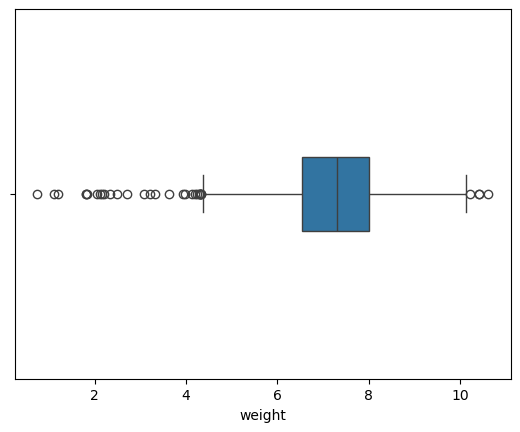

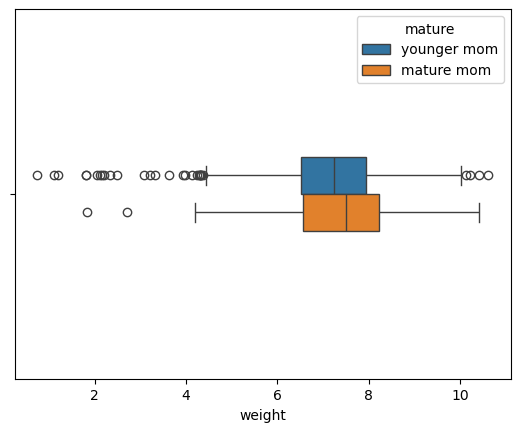

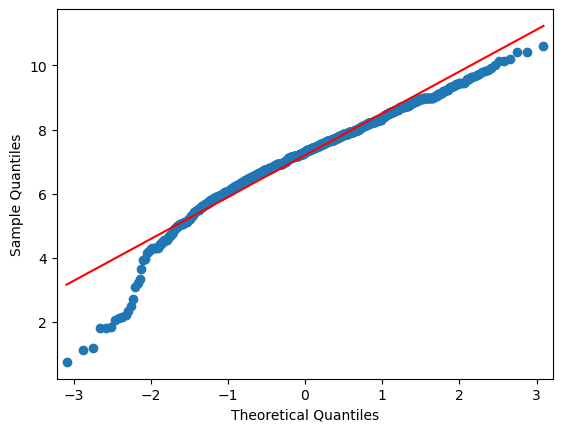

{'csvbase_row_id': [],
 'fage': [232, 333, 435, 827, 909, 943, 951],
 'mage': [35],
 'weeks': [14,
  18,
  27,
  30,
  35,
  47,
  56,
  65,
  67,
  70,
  72,
  103,
  116,
  155,
  176,
  186,
  189,
  192,
  193,
  213,
  250,
  274,
  276,
  282,
  328,
  339,
  341,
  378,
  385,
  402,
  418,
  426,
  459,
  463,
  476,
  492,
  497,
  528,
  558,
  594,
  607,
  618,
  637,
  646,
  647,
  657,
  665,
  668,
  693,
  698,
  747,
  764,
  772,
  779,
  785,
  796,
  810,
  834,
  858,
  863,
  896,
  900,
  912,
  920,
  925,
  933,
  936,
  959,
  968,
  975,
  994,
  997],
 'visits': [60,
  61,
  67,
  99,
  101,
  167,
  216,
  221,
  341,
  347,
  374,
  380,
  447,
  454,
  476,
  480,
  493,
  571,
  574,
  607,
  617,
  637,
  693,
  698,
  822,
  831,
  840,
  843,
  955,
  998],
 'gained': [15,
  28,
  87,
  123,
  134,
  141,
  155,
  200,
  201,
  217,
  304,
  334,
  380,
  409,
  453,
  463,
  505,
  535,
  554,
  581,
  601,
  636,
  744,
  796,
  880,
  900],
 'weig

In [43]:
# now is time to check outliers
# boxplot

sns.boxplot(data = births14, x = 'weight', width = 0.20)
plt.show()

# adavanced boxplot
sns.boxplot(data = births14, x = 'weight', hue = 'mature', width = 0.20)
plt.show()  

# Other way to check outliers
sm.qqplot(births14['weight'], line ='s')
plt.show()  

# Now is find the outliers in all numeric columns
numeric_cols = births14.select_dtypes(include=[np.number]).columns.tolist()             
outlier_indices = {}
for col in numeric_cols:        
    Q1 = births14[col].quantile(0.25)
    Q3 = births14[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = births14[(births14[col] < lower_bound) | (births14[col] > upper_bound)].index
    outlier_indices[col] = outliers.tolist()    
outlier_indices 


In [45]:
# Another way to check outliers values in each numeric column

# Select numerical columns
numerical_cols = births14.select_dtypes(include = ['number']).columns

for col in numerical_cols:
    # Find Q1, Q3, and interquartile range (IQR) for each column
    Q1 = births14[col].quantile(0.25)
    Q3 = births14[col].quantile(0.75)
    IQR = Q3 - Q1
    # Upper and lower bounds for each column
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    # Filter out the outliers from the DataFrame
    births14_clean = births14[(births14[col] >= lower_bound) & (births14[col] <= upper_bound)]
    print

**Cleaning the outlier Value**

In [49]:
# remove outliers from the dataset
# Select numerical columns
numerical_cols = births14.select_dtypes(include = ['number']).columns       
for col in numerical_cols:
    # Find Q1, Q3, and interquartile range (IQR) for each column
    Q1 = births14[col].quantile(0.25)
    Q3 = births14[col].quantile(0.75)
    IQR = Q3 - Q1
    # Upper and lower bounds for each column
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    # Filter out the outliers from the DataFrame
    births14 = births14[(births14[col] >= lower_bound) & (births14[col] <= upper_bound)]    
    

# Time for Misising Values
**Check the "NA" Values**

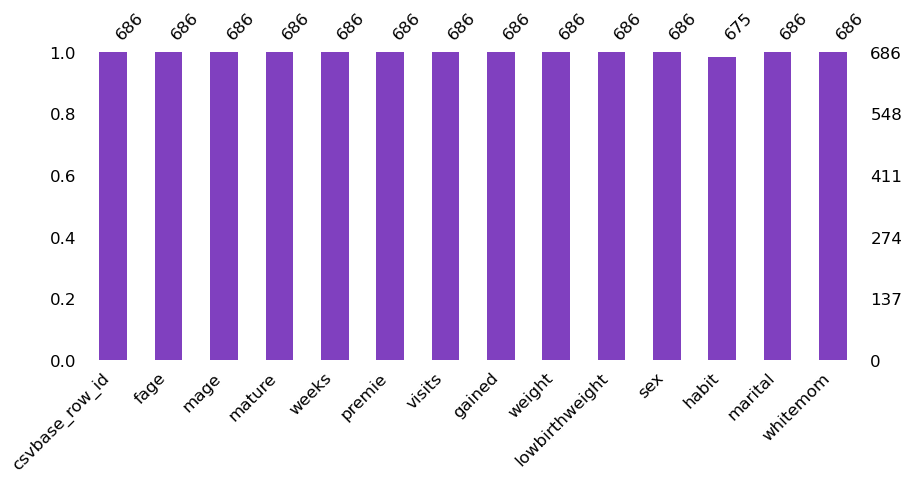

In [52]:
# check the "NA" values
msno.bar(births14, figsize=(10,4), fontsize=12, color=(0.5,0.25,0.75))
plt.show()  

In [59]:
# time to describe the missing values
births14.describe(include='all')
#Descibe the categorical variables  
births14.describe(include='object') 

,mature,premie,lowbirthweight,sex,habit,marital,whitemom
count,686,686,686,686,675,686,686
unique,2,2,2,2,2,2,2
top,younger mom,full term,not low,male,nonsmoker,married,white
freq,573,642,661,346,628,460,543


In [62]:
# Other way to check the catgorical variables
for col in births14.select_dtypes(include=['object','category']).columns:
    print(f"\nValue counts for column '{col}':")
    print(births14[col].value_counts())



Value counts for column 'mature':
mature
younger mom    573
mature mom     113
Name: count, dtype: int64

Value counts for column 'premie':
premie
full term    642
premie        44
Name: count, dtype: int64

Value counts for column 'lowbirthweight':
lowbirthweight
not low    661
low         25
Name: count, dtype: int64

Value counts for column 'sex':
sex
male      346
female    340
Name: count, dtype: int64

Value counts for column 'habit':
habit
nonsmoker    628
smoker        47
Name: count, dtype: int64

Value counts for column 'marital':
marital
married        460
not married    226
Name: count, dtype: int64

Value counts for column 'whitemom':
whitemom
white        543
not white    143
Name: count, dtype: int64


# Now is time for Normality Check
## Checking if the data follows a normal distribution is a common step in EDA.

Text(0, 0.5, 'Frequency')

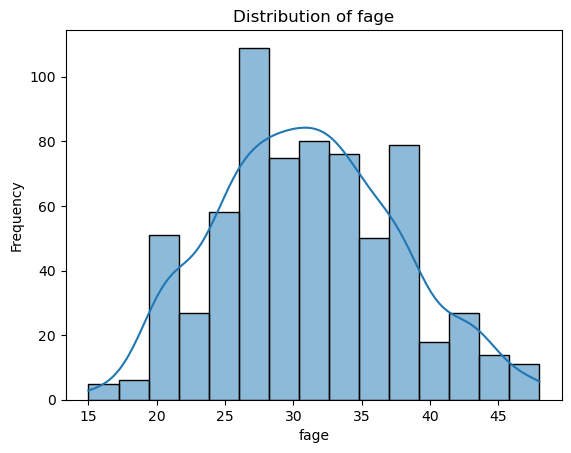

In [63]:
# time for Normality Check
# the distribution of 'fage' column
sns.histplot(births14['fage'], kde=True)
plt.title('Distribution of fage')
plt.xlabel('fage')
plt.ylabel('Frequency')     

In [ ]:
# Now for Skkewness and Kurtosis    
print(f"Skewness: {skewnorm.fit(births14['fage'])[0]}")
print(f"Kurtosis: {kurtosis(births14['fage'])}")        

 

Skewness: 1.3838373662978078
Kurtosis: -0.4105839063521364


# What is a Skewness and Kurtosis?
### Skewness is a measure of the asymmetry of the probability distribution of a real-valued random variable about its mean. 
### A positive skew indicates that the tail on the right side of the distribution is longer or fatter than the left side, while a negative skew indicates that the tail on the left side is longer or fatter than the right side.
### Kurtosis is a measure of the "tailedness" of the probability distribution of a real-valued random variable. 
### High kurtosis indicates that the data have heavy tails or outliers, while low kurtosis            indicates that the data have light tails or lack of outliers.  

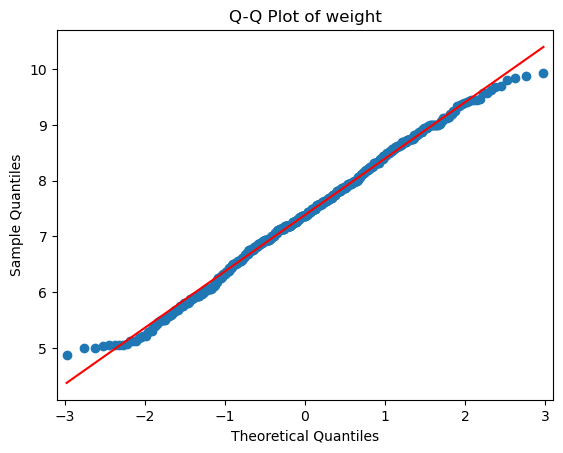

In [70]:
# Now is time to visualize skweness and kurtosis    
sm.qqplot(births14['weight'], line ='s')
plt.title('Q-Q Plot of weight')           
plt.show()


# Conclusions
**Always inspect your data first.**

**Visualize relationships and distributions.**

**Identify and handle outliers and missing values.**

**Check for normality and understand the distribution of your data.**